<h1><center>Programming Exercise 1:<br>Linear Regression</center></h1>

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,6)

# 1. Simple "Octave/Matlab" Function

In [10]:
A = np.identity(5,dtype=int) # default dtype is float
A

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

# 2. Linear Regression with One Variable
- Assignment: As a food truck business owner, use data of population size of a city and profit in that city to help decide in which city the next food truck should be placed. 
- Data in ex1data1.txt:
    - First column: population of a city
    - Second column: profit of food truck in the city

## 2.1 Plotting the Data
- Use a scatter plot to visualize the data

In [27]:
f = open('ex1data1.txt','r') # Could use Python's built-in open function
f.read() # but this is just a long string of the data, including new line characters
f.close()

'6.1101,17.592\n5.5277,9.1302\n8.5186,13.662\n7.0032,11.854\n5.8598,6.8233\n8.3829,11.886\n7.4764,4.3483\n8.5781,12\n6.4862,6.5987\n5.0546,3.8166\n5.7107,3.2522\n14.164,15.505\n5.734,3.1551\n8.4084,7.2258\n5.6407,0.71618\n5.3794,3.5129\n6.3654,5.3048\n5.1301,0.56077\n6.4296,3.6518\n7.0708,5.3893\n6.1891,3.1386\n20.27,21.767\n5.4901,4.263\n6.3261,5.1875\n5.5649,3.0825\n18.945,22.638\n12.828,13.501\n10.957,7.0467\n13.176,14.692\n22.203,24.147\n5.2524,-1.22\n6.5894,5.9966\n9.2482,12.134\n5.8918,1.8495\n8.2111,6.5426\n7.9334,4.5623\n8.0959,4.1164\n5.6063,3.3928\n12.836,10.117\n6.3534,5.4974\n5.4069,0.55657\n6.8825,3.9115\n11.708,5.3854\n5.7737,2.4406\n7.8247,6.7318\n7.0931,1.0463\n5.0702,5.1337\n5.8014,1.844\n11.7,8.0043\n5.5416,1.0179\n7.5402,6.7504\n5.3077,1.8396\n7.4239,4.2885\n7.6031,4.9981\n6.3328,1.4233\n6.3589,-1.4211\n6.2742,2.4756\n5.6397,4.6042\n9.3102,3.9624\n9.4536,5.4141\n8.8254,5.1694\n5.1793,-0.74279\n21.279,17.929\n14.908,12.054\n18.959,17.054\n7.2182,4.8852\n8.2951,5.7442\

In [32]:
# Can also use numpy to read that data into an array
# Each row in the txt file will be an entry in the array
f = np.loadtxt('ex1data1.txt',delimiter=',') # delimiting columns by ","
f

array([[  6.1101 ,  17.592  ],
       [  5.5277 ,   9.1302 ],
       [  8.5186 ,  13.662  ],
       [  7.0032 ,  11.854  ],
       [  5.8598 ,   6.8233 ],
       [  8.3829 ,  11.886  ],
       [  7.4764 ,   4.3483 ],
       [  8.5781 ,  12.     ],
       [  6.4862 ,   6.5987 ],
       [  5.0546 ,   3.8166 ],
       [  5.7107 ,   3.2522 ],
       [ 14.164  ,  15.505  ],
       [  5.734  ,   3.1551 ],
       [  8.4084 ,   7.2258 ],
       [  5.6407 ,   0.71618],
       [  5.3794 ,   3.5129 ],
       [  6.3654 ,   5.3048 ],
       [  5.1301 ,   0.56077],
       [  6.4296 ,   3.6518 ],
       [  7.0708 ,   5.3893 ],
       [  6.1891 ,   3.1386 ],
       [ 20.27   ,  21.767  ],
       [  5.4901 ,   4.263  ],
       [  6.3261 ,   5.1875 ],
       [  5.5649 ,   3.0825 ],
       [ 18.945  ,  22.638  ],
       [ 12.828  ,  13.501  ],
       [ 10.957  ,   7.0467 ],
       [ 13.176  ,  14.692  ],
       [ 22.203  ,  24.147  ],
       [  5.2524 ,  -1.22   ],
       [  6.5894 ,   5.9966 ],
       [

In [34]:
# Can further use unpack=True so that the array is transposed and can be unpacked as follows
population,profit = np.loadtxt('ex1data1.txt',delimiter=',',unpack=True)
population
profit

array([ 17.592  ,   9.1302 ,  13.662  ,  11.854  ,   6.8233 ,  11.886  ,
         4.3483 ,  12.     ,   6.5987 ,   3.8166 ,   3.2522 ,  15.505  ,
         3.1551 ,   7.2258 ,   0.71618,   3.5129 ,   5.3048 ,   0.56077,
         3.6518 ,   5.3893 ,   3.1386 ,  21.767  ,   4.263  ,   5.1875 ,
         3.0825 ,  22.638  ,  13.501  ,   7.0467 ,  14.692  ,  24.147  ,
        -1.22   ,   5.9966 ,  12.134  ,   1.8495 ,   6.5426 ,   4.5623 ,
         4.1164 ,   3.3928 ,  10.117  ,   5.4974 ,   0.55657,   3.9115 ,
         5.3854 ,   2.4406 ,   6.7318 ,   1.0463 ,   5.1337 ,   1.844  ,
         8.0043 ,   1.0179 ,   6.7504 ,   1.8396 ,   4.2885 ,   4.9981 ,
         1.4233 ,  -1.4211 ,   2.4756 ,   4.6042 ,   3.9624 ,   5.4141 ,
         5.1694 ,  -0.74279,  17.929  ,  12.054  ,  17.054  ,   4.8852 ,
         5.7442 ,   7.7754 ,   1.0173 ,  20.992  ,   6.6799 ,   4.0259 ,
         1.2784 ,   3.3411 ,  -2.6807 ,   0.29678,   3.8845 ,   5.7014 ,
         6.7526 ,   2.0576 ,   0.47953,   0.20421, 

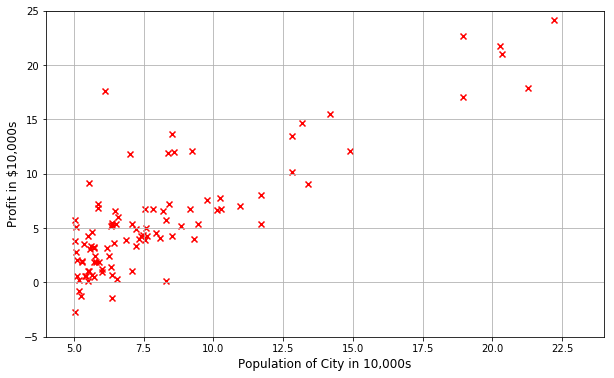

In [55]:
plt.figure()
plt.clf()
plt.grid(True)
plt.scatter(population,profit,marker='x',c='r')
plt.xlim(4,24)
plt.ylim(-5,25)
plt.xlabel('Population of City in 10,000s',fontsize=12)
plt.ylabel('Profit in $10,000s',fontsize=12)
plt.legend()

## 2.2 Gradient Descent
- Fit linear regression parameters $\theta$ to our dataset using GD
- Note that the symbol "$" is a Latex notation wrapper, single dollar sign for inline and double for new line
    - See http://data-blog.udacity.com/posts/2016/10/latex-primer/

In [61]:
# First let's append a column of values of x_0 = 1 to our population array
x0 = np.ones_like(population)
design = np.c_[x0,population] # we have built the "design matrix" (see notes)
design 

array([[  1.    ,   6.1101],
       [  1.    ,   5.5277],
       [  1.    ,   8.5186],
       [  1.    ,   7.0032],
       [  1.    ,   5.8598],
       [  1.    ,   8.3829],
       [  1.    ,   7.4764],
       [  1.    ,   8.5781],
       [  1.    ,   6.4862],
       [  1.    ,   5.0546],
       [  1.    ,   5.7107],
       [  1.    ,  14.164 ],
       [  1.    ,   5.734 ],
       [  1.    ,   8.4084],
       [  1.    ,   5.6407],
       [  1.    ,   5.3794],
       [  1.    ,   6.3654],
       [  1.    ,   5.1301],
       [  1.    ,   6.4296],
       [  1.    ,   7.0708],
       [  1.    ,   6.1891],
       [  1.    ,  20.27  ],
       [  1.    ,   5.4901],
       [  1.    ,   6.3261],
       [  1.    ,   5.5649],
       [  1.    ,  18.945 ],
       [  1.    ,  12.828 ],
       [  1.    ,  10.957 ],
       [  1.    ,  13.176 ],
       [  1.    ,  22.203 ],
       [  1.    ,   5.2524],
       [  1.    ,   6.5894],
       [  1.    ,   9.2482],
       [  1.    ,   5.8918],
       [  1.  

In [95]:
def hypothesis(design,theta):
    '''
    Computes the hypothesis fuction which in matrix notation is H = X * Theta
    where X is the m by (n+1) design matrix and Theta is an (n+1) vector of the fit parameters
    Returns H which is an m by 1 matrix 
    
    Parameters
    ----------
    design: m by (n+1) design matrix
    theta: (n+1) fit parameter vector
    
    Returns
    -------
    hyp: m-dimensional hypothesis function vector 
    '''
    
    hyp = np.dot(design,theta)
    return hyp

In [96]:
def costFunction(design,theta,output):
    '''
    Computes the cost function J = 1/2m*(X*Theta-Y)^T*(X*Theta-Y) which is a function of Theta for a given sample set
    X is the design matrix of shape m by (n+1), Theta is the fit (n+1) parameter vector, and Y is the m output vector
    Returns the scalar J
    
    Parameters
    ----------
    design: m by (n+1) design matrix
    theta: (n+1) fit parameter vector
    output: m-dimensional output vector
    
    Returns
    -------
    costJ: value of the cost function (scalar) 
    '''
    costArg = hypothesis(design,theta) - output
    m = np.shape(design)[0] # sample size
    costJ = 1/(2*m)*np.dot(np.transpose(costArg),costArg)
    return costJ

In [186]:
# Let's initialize the theta vector
theta = np.zeros(np.shape(design)[1]) # Theta is an (n+1) vector
theta

array([ 0.,  0.])

In [187]:
# Test the cost function and hypothesis function
costFunction(design,theta,profit)

32.072733877455669

In [188]:
# As we iterate through different values of theta we want to keep a record of J
history_j = dict.fromkeys(['theta_history','J_history'])

# How many iterations of GD? Learning rate?
iterations = 1500
alpha = 0.01

# Allocate space
history_j['J_history'] = np.empty(iterations)
history_j['theta_history'] = np.empty((iterations,np.shape(theta)[0]))

In [189]:
def gradientDescent(design,theta,output,history_j=None,alpha=0.1,iterations=0):
    '''
    Performs update of (n+1) fit parameters with batch gradient descent method, i.e
        Theta_J := Theta_j - alpha*dJ/dTheta_j for j=0,2,..,n
                 = Theta - X^T*(X*Theta-y)
        
    Parameters
    ----------
    design: m by (n+1) design matrix
    theta: (n+1) fit parameter vector
    output: m-dimensional output vector
    history_j (optional): dictionary with key "theta_history" where we keep all values of theta vector as we iterate
    alpha: scalar learning rate
    iterations: number of iterations
    '''
    print('Initial values:')
    for idx_theta,ii_theta in enumerate(theta):
        print('\tTheta_{}: {}'.format(str(idx_theta),ii_theta))
        print('\tCost Function J: {}'.format(costFunction(design,theta,output)))
    m = np.shape(design)[0] # sample size
    
    # Step through parameter space
    for ii_iter in range(iterations):
        theta[:] = theta - (alpha/m)*np.dot(np.transpose(design),hypothesis(design,theta)-output) # [:] will assign values to the elements of the theta array and thus will change the original array
                                                                                                  # if we do theta = tem_theta instead, the value it pointed to before the assignment in this function will remain unchanged
        if history_j is not None: # if we've provided a dictionary, save the respective value
            history_j["theta_history"][ii_iter] = theta
            history_j["J_history"][ii_iter] = costFunction(design,theta,output)
    
    print('\nAfter {} iterations, final values:'.format(iterations))
    for idx_theta,ii_theta in enumerate(theta):
        print('\tTheta_{}: {}'.format(str(idx_theta),ii_theta))
        
    print('\tCost Function J: {}'.format(costFunction(design,theta,output)))

In [190]:
gradientDescent(design,theta,profit,history_j,alpha,iterations)

Initial values:
	Theta_0: 0.0
	Cost Function J: 32.07273387745567
	Theta_1: 0.0
	Cost Function J: 32.07273387745567

After 1500 iterations, final values:
	Theta_0: -3.63029143940436
	Theta_1: 1.166362350335582
	Cost Function J: 4.483388256587726


In [191]:
# Let's check theta
theta

array([-3.63029144,  1.16636235])

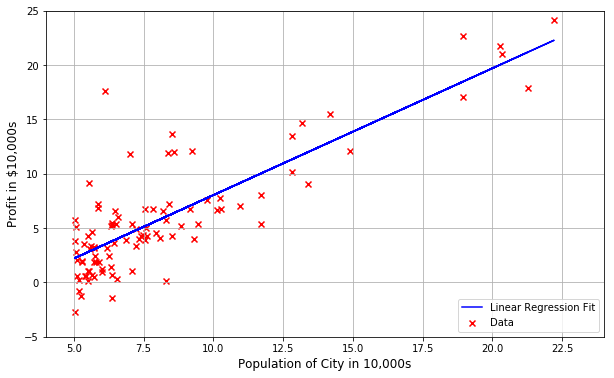

In [192]:
# Plot the fit to the data
plt.figure()
plt.clf()
plt.grid(True)
plt.scatter(population,profit,marker='x',c='r',label='Data')
plt.plot(population,hypothesis(design,theta),'-b',label='Linear Regression Fit')
plt.xlim(4,24)
plt.ylim(-5,25)
plt.xlabel('Population of City in 10,000s',fontsize=12)
plt.ylabel('Profit in $10,000s',fontsize=12)
plt.legend(loc='lower right',fontsize='medium')
plt.show()

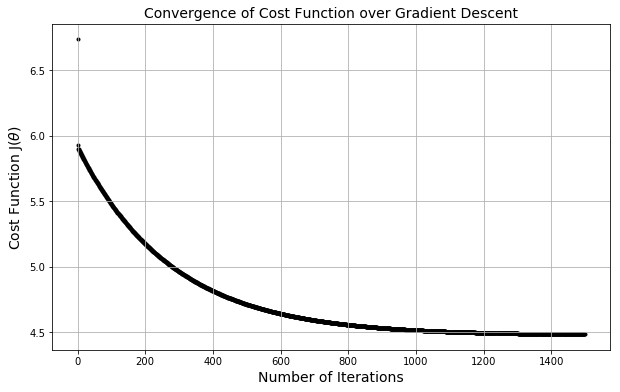

In [202]:
# Plot the values of the cost function over iterations of GD
plt.figure()
plt.clf()
plt.grid(True)
plt.scatter(np.arange(iterations),history_j['J_history'],marker='.',c='k')
plt.xlabel("Number of Iterations",fontsize=14)
plt.ylabel("Cost Function J($\\theta$)",fontsize=14)
plt.title("Convergence of Cost Function over Gradient Descent",fontsize=14)
plt.show()

In [203]:
# Now we need to visualize the cost function over a mesh of values of theta_0 and theta_1

# Mesh
h = .02  # step size in the mesh
theta0_min, theta0_max = -10,10
theta1_min, theta1_max = -1,4
xx, yy = np.meshgrid(np.arange(theta0_min, theta0_max, h),np.arange(theta1_min, theta1_max, h))

# 3. Linear Regression with Multiple Variables